<h1> 폐렴아 기다려라! <h1>

딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있다.

하지만, 의료 영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징이 있다.

---

- 의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않습니다.
- 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌉니다.
- 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일입니다.
- 음성/양성 데이터 간 imbalance가 심합니다. 학습에 주의가 필요합니다.
- 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있습니다.

$ mkdir -p ~/aiffel/EXPLORATION/11/chest_xray

$ ln -s ~/data/ ~/aiffel/EXPLORATION/11/chest_xray


## 의료영상에 대해

### 사람 속을 보는 방법, 의료 영상 종류

X-RAY

- X-RAY는 전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)을 말합니다. X-RAY는 방사선의 일종으로 지방, 근육, 천, 종이같이 밀도가 낮은 것은 수월하게 통과하지만, 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못합니다.


CT

- CT는 Computed Tomography의 줄임말로, 환자를 중심으로 X-RAY를 빠르게 회전하여 3D 이미지를 만들어내는 영상입니다. 환자의 3 차원 이미지를 형성하여 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별하고 위치를 파악할 수 있습니다.
- 신체의 단면 이미지를 "Slice"라고 합니다. 이러한 Slice는 단층 촬영 이미지라고도 하며 기존의 X-RAY보다 더 자세한 정보를 포함합니다.

MRI

- MRI는 Magnetic Resonance Imaging(자기 공명 영상)의 줄임말로 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술입니다. MRI 스캐너는 강한 자기장를 사용하여 신체 기관의 이미지를 생성합니다. MRI는 CT, X-RAY와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전합니다.



## X-RAY 이미지

X-RAY 이미지를 이해하려면, X-RAY 영상을 촬영하기 위해 사용되는 자세 분류 체계를 이해하는 것이 중요합니다.

### 의료영상 자세 분류

![](https://github.com/MulderKim/EXPLORATION/blob/main/11/etc/06.max-800x600.png?raw=true)

의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행된다.

- Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면.
- Coronal plane : 관상면. 인체를 앞뒤로 나누는 면.
- Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면.

오늘 사용할 데이터는 모두 관상면 이미지로 되어 있다.
![](https://github.com/MulderKim/EXPLORATION/blob/main/11/etc/08.max-800x600.png?raw=true)
처음에 많이 헷갈리는건 오른쪽과 왼쪽에 대해부분으로 우리가 영상을 볼 때는 보통 정면을 보고 있는 것으로 가정을 하며 위의 이미지에서 오른쪽에 해당된다.

오른쪽 이미지에서 왼쪽 얼굴을 보면, 일반적으로 우리가 보기에 왼쪽에 있는 얼굴을 봤겠지만 '오른쪽'(Right) 글씨가 써져 있는 것을 보수있는데,
의학 쪽에선 실제 사람의 왼쪽 얼굴을 봐야 한다. 이미지에서 왼쪽이라고 써져 있는 부분의 얼굴을 봐야 한다.


### X-RAY 특성

---

X-RAY는 전자기파가 몸을 통과한 결과를 이미지화 시킨 것으로 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 된다.

X-RAY는 부위에 따라서 명암이 다르게 나옵니다.

![](https://github.com/MulderKim/EXPLORATION/blob/main/11/etc/09.max-800x600.png?raw=true)

위의 사진은 손을 찍은 사진으로

- 뼈 : 하얀색
- 근육 및 지방 : 연한 회색
- 공기 : 검은색

![](https://github.com/MulderKim/EXPLORATION/blob/main/11/etc/10.png?raw=true)

흉부 쪽의 영상을 보면

- 갈비뼈 : 하얀색
- 폐 : 검은색
- 어깨 쪽의 지방 및 근육 : 연한 회색

폐는 공기가 많이 차 있기 때문에 저렇게 검은색으로 나오게 되는데, 위에서 본 손 사진도 공기 중은 검게 나온 것을 볼 수 있다.

## 폐렴을 진단해보자(1)

의료 인공지능은 다양한 분야에서 사용되고, 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용된다.

이 중에서 현재 가장 핫한 분야는 질병을 탐지해내는 인공지능인데, 이제 우리는 의사처럼 질병을 찾아내는 딥러닝 모델을 만들어보려고 한다.

우리는 폐렴(Pneumonia)을 찾아내는 딥러닝 모델을 만드는 것입니다. 



### 데이터셋

이번 노드에서 사용할 데이터는 캐글의 Chest X-Ray Images 입니다.

데이터의 구성은 ~/aiffel/chest_xray/data 하위에 3개의 폴더 (train, test, val)로 구성되며, 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함합니다. 5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)가 있습니다. 전체 데이터의 크기는 총 1.2GB 가량 됩니다.

해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X선 영상입니다. 

폐렴이란?
우리가 데이터를 직접 분석하기 전에 폐렴에 대해서 알아야겠죠? 폐렴은 무엇일까요? 

폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.

출처 : https://ko.wikipedia.org/wiki/폐렴

염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처 부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.

출처 : https://ko.wikipedia.org/wiki/염증

염증은 쉽게 말해 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 장소라고 할 수 있습니다. 폐렴이라면 폐에서 바이러스나 세균으로부터 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 상황이라고 생각하시면 됩니다.



### 1. Set-up


가장 먼저, 패키지(라이브러리)들을 import 해보겠습니다.

우리가 이번 프로젝트에서 사용할 패키지 목록입니다.

In [1]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel/EXPLORATION/11/')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*'
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel/EXPLORATION/11/


### 2. 데이터 가져오기

In [3]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


개수 비는 89%, 10.7%, 0.3% 입니다. val 개수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져와보는걸루...

train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할

In [4]:
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


train 데이터 안에 정상 이미지 수와 폐렴 이미지 수를 한번 보겠습니다.

In [5]:
# 정상 이미지와 폐렴 이미지를 구분해야 하는데
# 다행히도 파일 경로에 힌트가 있어요
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/EXPLORATION/11//chest_xray/data/train/NORMAL/IM-0614-0001.jpeg
Pneumonia image path
/aiffel/aiffel/EXPLORATION/11//chest_xray/data/train/PNEUMONIA/person1346_bacteria_3430.jpeg


In [6]:
# 이제 파일 경로에 NORMAL이 있는지 확인하면 정상 이미지를 셀 수 있습니다.
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

# 파일 경로에 PNEUMONIA이 있는지 확인하면 폐렴 이미지도 셀 수 있습니다.
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


tf.data 인스턴스를 만들어 봅시다. tf.data는 tensorflow에서 학습시킬 때, 배치처리 작업을 보다 효율적으로 할 수 있도록 해준다.

In [7]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

Train 데이터셋, validation 데이터셋 개수 확인

In [8]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


파일 경로에 'NORMAL'이나 'PNEUMONIA'가 포함되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어 주는 함수를 만들어 보면..

In [9]:
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

이미지의 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄여보자.

decode_img 함수와 process_path 함수를 만들고, process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경. 

get_label을 이용해서 라벨 값을 가져옵니다

In [10]:
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

train 데이터 셋과 validation 데이터 셋을 만든다. 

num_parallel_calls 파라미터에서 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터를 처리해 준다.

In [11]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

이미지가 잘 리사이즈 되었는지, 그리고 라벨이 잘 들어가 있는지 확인

In [12]:
for image, label in train_ds.take(1): # train_ds.take(1)은 하나의 데이터만 가져온다는 의미
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


train과 validation 데이터셋을 만든 것처럼 test 데이터셋도 만들어 보고 데이터 개수도 확인해보면...

In [13]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해준다.

prepare_for_training() 함수는 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환 시켜준다.

shuffle()을 사용하며 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택한다.

repeat()를 사용하면 epoch를 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 해준다.

예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 됩니다. repeat()를 사용하면 자동으로 데이터를 맞춰준다.

batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주는데, 예로 100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 된다.

prefetch()를 사용하면 학습 데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있다.

In [14]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### 3. 데이터 시각화

데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치를 추출하고, 추출된 배치를 image와 label 데이터 셋으로 나눕니다. 이제 show_batch() 함수를 이용해서 결과 사진을 보면

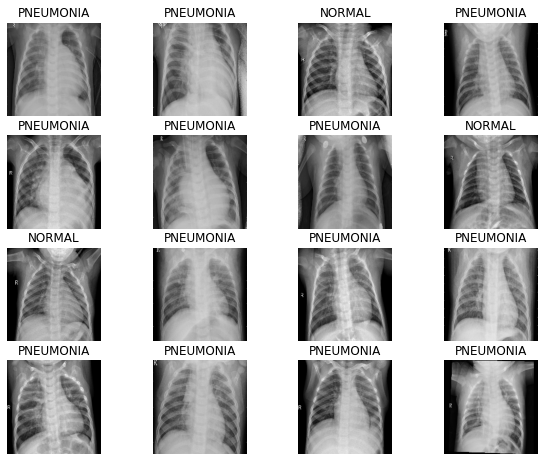

In [15]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(5,math.ceil(BATCH_SIZE/5),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

## 폐렴을 진단해보자(2)

4. CNN 모델링
가장 대표적인 딥러닝 모델인 CNN을 모델링하고 결과를 만들어 보겠습니다.

여러분들도 많이 봐 왔던 모델이기 때문에 잘 아시겠지만 기억이 안 나시는 분들에게 참고할 만한 사이트를 소개해드리겠습니다.

CNN, Convolutional Neural Network 요약
먼저, Convolution block을 만듭니다. conv_block()의 구성은 Convolution을 두 번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결합니다. 그리고 Max Pooling을 합니다.

In [16]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

Dense Block은 아래와 같이 만듭니다.

In [17]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

우리가 만들 CNN 모델은 약간의 수정을 거쳐 만들어진 모델fh Batch Normalization과 Dropout이라는 두 가지 regularization 기법이 동시에 사용되고 있다.

일반적으로 이런 방법은 잘 사용되지 않거나, 금기시되기도 합니다. 대표적으로 아래와 같은 논문의 사례를 들 수 있습니다.

Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift 논문에서는 variance shift를 억제하는 Batch Normalization과 이를 유발하는 Dropout을 동시에 사용하는 것이 어울리지 않는다고 밝히고 있습니다.

그러나, 실용적으로는 두 방법을 같이 쓰는 것이 낫다고 보는 견해도 없는 것은 아니다. 예외적으로 동시에 사용하는 것이 성능 향상에 도움을 주는 경우가 실제로 있습니다. 아래 논문과 같이 두 방법을 같이 쓰는 것을 옹호하는 경우도 있습니다.

Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks

이번 실습에서는 두 가지를 함께 사용하는 이 모델이 성능 향상에 도움이 될지 여부도 흥미롭게 살펴볼만 한 부분입니다.

In [18]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 5. 데이터 imbalance 처리

위에서 얘기했던 데이터 imbalance 문제입니다.
'Normal'과 폐렴에서 'Pneumonia' 중에 'Pneumonia' 데이터가 많이 있었죠? 한 라벨이 너무 많은 경우를 imbalance 하다고 하는데, 데이터를 학습할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있습니다.

이런 문제들을 해결하는 방법으로 Weight balancing이라는 테크닉이 사용됩니다. Weight balancing 은 training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법입니다. Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight 에 이러한 클래스별 가중치를 세팅할 수 있도록 지원하고 있습니다. 상세한 내용은 아래 링크를 참고합시다.

딥러닝에서 클래스 불균형을 다루는 방법
아래 코드에서 weight_for_0은 'Normal' 이미지에 사용할 weight를, weight_for_1은 'Pneumonia' 이미지에 사용할 weight를 세팅합니다. 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정됩니다.

In [19]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


### 6. 모델 훈련

이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택합니다. 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언합니다.

이미지의 라벨이 두 개밖에 없기 때문에 "binary_cross entropy" loss를 사용합니다. optimizer로 'adam'을 사용합니다.
성과에 대해서 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용합니다.

In [20]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

모델을 fit 해보겠습니다. 각 파라미터에 위에서 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어줍니다. (모델 학습시 약 20분 이상 소요 됩니다.)



In [21]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 62s 136ms/step - loss: 0.4940 - accuracy: 0.7371 - precision: 0.9181 - recall: 0.7022 - val_loss: 0.6897 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 34s 129ms/step - loss: 0.2383 - accuracy: 0.9088 - precision: 0.9734 - recall: 0.9016 - val_loss: 1.2475 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 34s 130ms/step - loss: 0.2256 - accuracy: 0.9168 - precision: 0.9725 - recall: 0.9137 - val_loss: 0.1109 - val_accuracy: 0.9615 - val_precision: 0.9763 - val_recall: 0.9712
Epoch 4/25
261/261 [==============================] - 34s 132ms/step - loss: 0.1951 - accuracy: 0.9310 - precision: 0.9822 - recall: 0.9253 - val_loss: 0.6230 - val_accuracy: 0.7404 - val_precision: 0.9980 - val_recall: 0.6474
Epoch 5/25
261/261 [==============================] - 34s 131ms/step - loss: 0.2017 - accura

### 7. 결과 확인

이제 결과를 확인해보겠습니다. 그래프로 Epochs 마다 모델의 precision, recall, accuracy, loss가 어떻게 변하는지 보여줍니다.

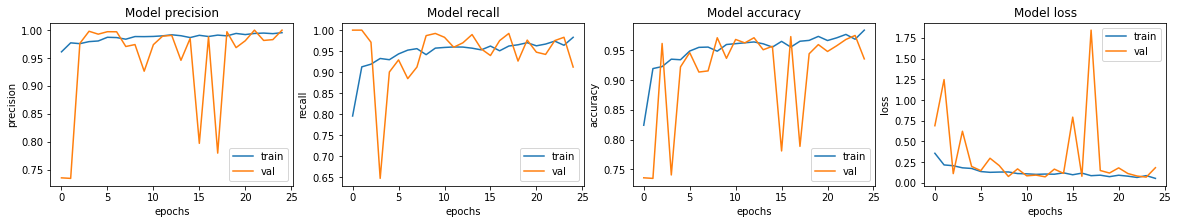

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

테스트 데이터로 모델 평가를 해보겠습니다.

모델 평가를 위해 loss, accuracy, precision, recall 값을 출력해보겠습니다.

In [23]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 3s 74ms/step - loss: 1.0612 - accuracy: 0.8381 - precision: 0.8233 - recall: 0.9436
Loss: 1.0612173080444336,
Accuracy: 0.8381410241127014,
Precision: 0.8232662081718445,
Recall: 0.9435897469520569


이제 여러분들도 페렴 진단에 있어서 약 80% 정도는 맞출 수 있게 되었습니다.
의사분들이 90% 이상이시니 거의 비슷한 실력이라기에는 다소 모자라는 느낌은 있지만 의료 보조 용도로는 어느 정도 쓸만한 모델이라고는 할 수 있겠습니다.

그럼 성능을 좀 더 개선해볼 수 있는 방법은 없을까요?
오늘 우리가 다룬 폐렴 데이터를 기반으로 한 연구도 많이 찾아볼 수 있습니다.

의료 데이터의 경우 구하기도 어렵고 구하더라도 데이터가 작은 경우가 많이 있습니다. 이런 문제를 해결하기 위해 Data augmentation 방법을 많이 시도합니다.
Data augmentation 은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많습니다. 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용합니다. 이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용합니다. 특히 장기의 크기는 사람마다 거의 바뀌지 않습니다. 이런 특성을 이용한 방법이 노이즈 추가 방법입니다.

전통적인 Data augmentation 방법 이외에도 GAN을 이용해서 Data augmentation을 시도하는 연구들도 많이 있으니 참고하시면 좋을 것 같습니다.



## 프로젝트 : 폐렴 진단기 성능개선

### Step 1. 실험환경 Set-up

거의 바꿔볼 수 있을 게 없을 것 같지만, Batch size, Epoch 등을 변경해볼 수 있을 것입니다.

라이브러리 불러오기

In [24]:
import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지

In [25]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 데이터 ROOT 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel/EXPLORATION/11')

# BATCH_SIZE 변수
BATCH_SIZE_1 = 32
BATCH_SIZE_2 = 32
BATCH_SIZE_3 = 32
BATCH_SIZE_4 = 32
BATCH_SIZE_5 = 32

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# EPOCH 크기 변수
EPOCHS_1 = 30
EPOCHS_2 = 30
EPOCHS_3 = 30
EPOCHS_4 = 30
EPOCHS_5 = 30

print(ROOT_PATH)


/aiffel/aiffel/EXPLORATION/11


### Step 2. 데이터 준비하기

원본 데이터를 가져와서 전처리 및 배치 구성을 진행합니다.
의료 영상 이미지의 특성상 데이터는 언제나 충분하지 않습니다. 이를 극복할 수 있는 방법을 고민해 봅시다.

이전 실습에서 고려하지 않았던 augmentation 기법을 고려해 볼 수 있을 것입니다. 그러나 의료 영상인 경우, 일반적인 이미지 처리에서 사용하는 augmentation들이 항상 도움이 된다고 말할 수 없습니다. 특히 X-RAY 같은 의료 영상의 특성상, 육안으로도 구분하기 어려운 미묘한 차이에 더해진 노이즈 등 부수효과가 오히려 방해를 줄 수도 있기 때문입니다.
그래서 augmentation 도입은 신중해야 합니다.

만약 예를 들어 좌우 반전 정도의 augmentation만 도입한다고 한다면 다음과 같이 진행될 것입니다.

데이터 가져오기

In [26]:
train_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/data/train/*/*'))
test_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/data/test/*/*'))
val_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/data/val/*/*'))

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))


5216
624
16


갯수 비는 89%, 10.7%, 0.3%, val 갯수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져와보기

train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할¶ 

In [27]:
filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/data/train/*/*'))
filenames.extend(tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/data/val/*/*')))

# train, test(val) dataset으로 분할. test_size에 0.2는 20%롤 의미함.
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

print(len(train_filenames))
print(len(val_filenames))

4185
1047


train 데이터 안에 정상 이미지 수와 폐렴 이미지 수¶

In [28]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1092
Pneumonia images count in training set: 3093


tf.data 인스턴스를 만들기

In [29]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

Train 데이터 셋, validation 데이터 셋 갯수 확인

In [30]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 4185
Validating images count: 1047


라벨 이름들을 확인

In [31]:
CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(ROOT_PATH + "/chest_xray/data/train/*"))])
print(CLASS_NAMES)

['PNEUMONIA' 'NORMAL']


라벨 데이터를 만들어 주는 함수

In [32]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)를 리턴하게 합니다.

decode_img 함수와 process_path 함수를 만들기

In [33]:
def decode_img(img):
  # 이미지를 uint8 tensor로 바꾼다.
  img = tf.image.decode_jpeg(img, channels=3)
  # img를 범위 [0,1]의 float32 데이터 타입으로 바꾼다.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img의 이미지 사이즈를 IMAGE_SIZE에서 지정한 사이즈로 수정한다.
  return tf.image.resize(img, IMAGE_SIZE)

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

train 데이터 셋과 validation 데이터 셋을 만들기


num_parallel_calls 파라미터에서 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터를 처리

In [34]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

baseline

In [35]:
def prepare_for_training_1(ds, shuffle_buffer_size=1000):

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE_1)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_1 = prepare_for_training_1(train_ds)
val_ds_1 = prepare_for_training_1(val_ds)

좌우반전

In [36]:
def augment_LR(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training_LR(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment_LR,       # augment 함수 적용
            num_parallel_calls=2
        )

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE_2)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_2 = prepare_for_training_LR(train_ds)
val_ds_2 = prepare_for_training_LR(val_ds)

이미지 대비

In [37]:
def augment_C(image,label):
    image = tf.image.adjust_contrast(image, 0.5)  # 이미지의 대비를 조절
    return image,label

def prepare_for_training_C(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment_C,       # augment 함수 적용
            num_parallel_calls=2
        )

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE_3)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_3 = prepare_for_training_C(train_ds)
val_ds_3 = prepare_for_training_C(val_ds)

drop out 제거

In [38]:
def prepare_for_training_4(ds, shuffle_buffer_size=1000):

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE_4)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_4 = prepare_for_training_4(train_ds)
val_ds_4 = prepare_for_training_4(val_ds)

regularization

In [39]:
def prepare_for_training_5(ds, shuffle_buffer_size=1000):

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE_5)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds_5 = prepare_for_training_5(train_ds)
val_ds_5 = prepare_for_training_5(val_ds)

In [40]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


In [41]:
test_list_ds = tf.data.Dataset.list_files(str(ROOT_PATH + '/chest_xray/data/test/*/*'))
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds_1 = test_ds.batch(BATCH_SIZE_1)
test_ds_2 = test_ds.batch(BATCH_SIZE_2)
test_ds_3 = test_ds.batch(BATCH_SIZE_3)
test_ds_4 = test_ds.batch(BATCH_SIZE_4)
test_ds_5 = test_ds.batch(BATCH_SIZE_5)

print(TEST_IMAGE_COUNT)

624


### Step 3. 데이터 시각화

학습용 데이터를 시각화해서 확인해 봅니다.
만약 augmentation을 시도했다면 이후 실습 코드에 있는 show_batch() 함수를 통해 실제로 좌우 반전 등이 제대로 처리되었는지 확인해 봅시다.

base line

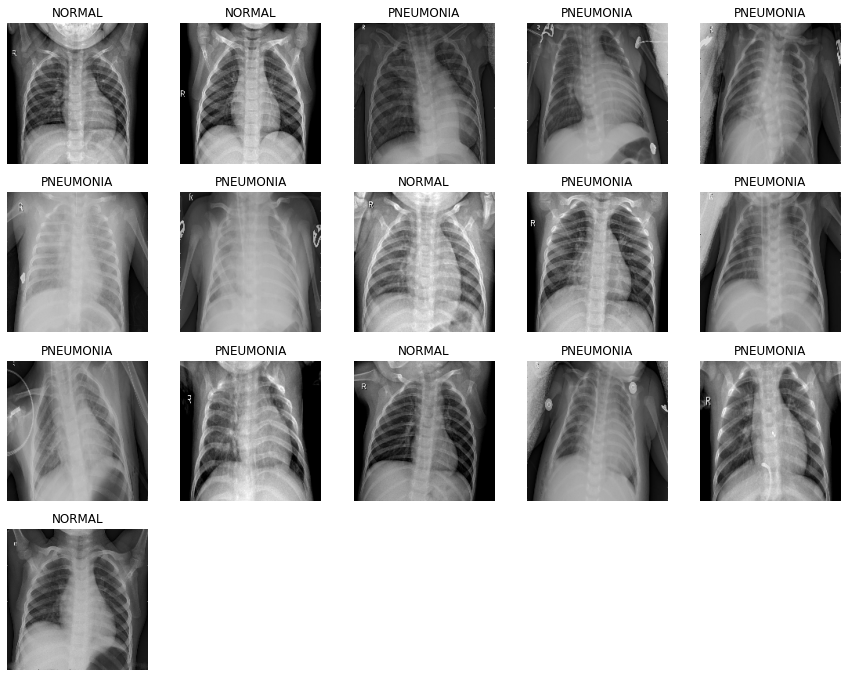

In [42]:
image_batch_1, label_batch_1 = next(iter(train_ds_1))

def show_batch_1(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch_1[n])
        if label_batch_1[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch_1(image_batch_1.numpy(), label_batch_1.numpy())

좌우 반전

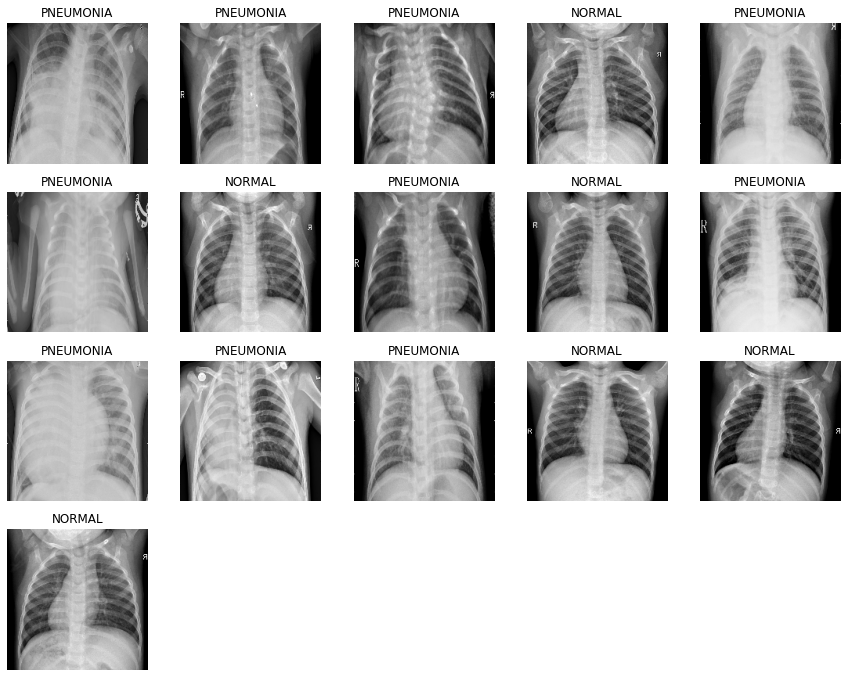

In [43]:
image_batch_2, label_batch_2 = next(iter(train_ds_2))

def show_batch_2(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch_2[n])
        if label_batch_2[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch_2(image_batch_2.numpy(), label_batch_2.numpy())

이미지 대비

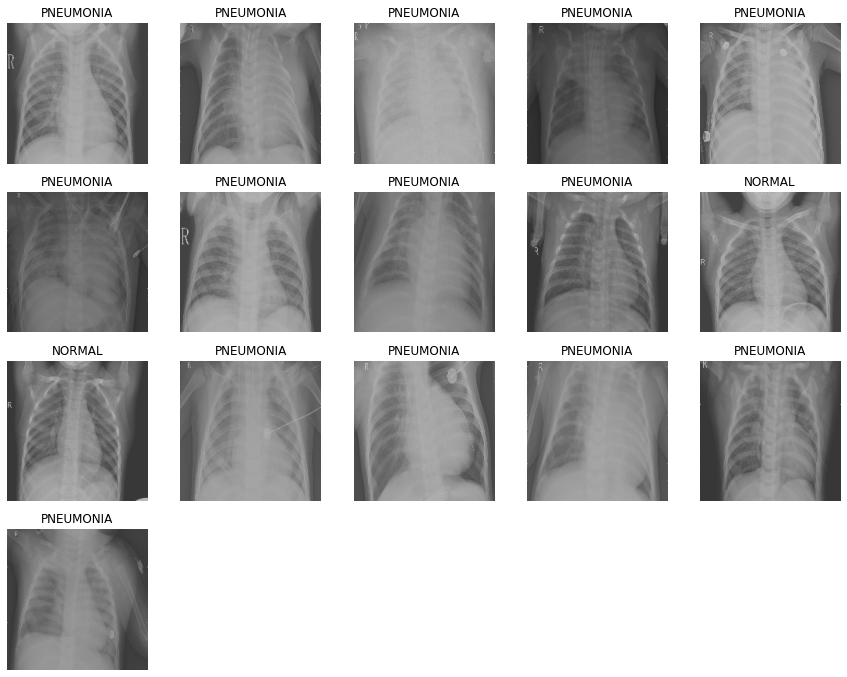

In [44]:
image_batch_3, label_batch_3 = next(iter(train_ds_3))

def show_batch_3(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch_3[n])
        if label_batch_3[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch_3(image_batch_3.numpy(), label_batch_3.numpy())

drop out 제거

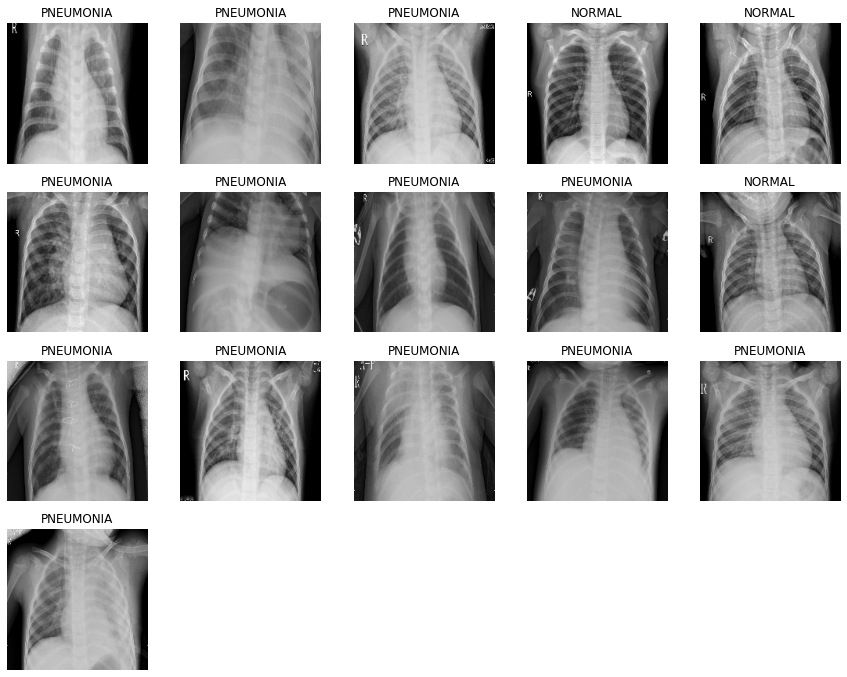

In [45]:
image_batch_4, label_batch_4 = next(iter(train_ds_4))

def show_batch_4(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch_4[n])
        if label_batch_4[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch_4(image_batch_4.numpy(), label_batch_4.numpy())

regularization

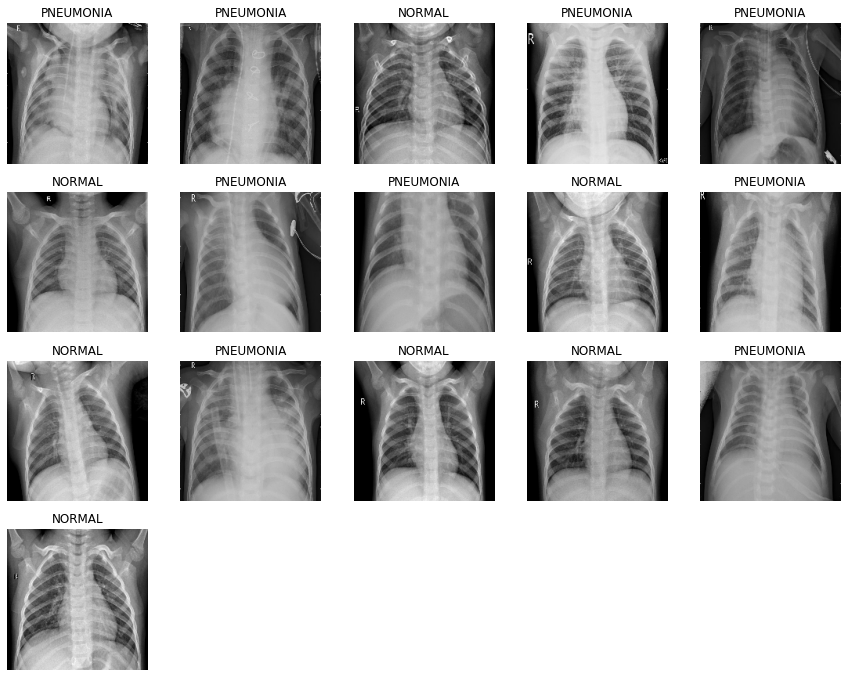

In [46]:
image_batch_5, label_batch_5 = next(iter(train_ds_5))

def show_batch_5(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch_5[n])
        if label_batch_5[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch_5(image_batch_5.numpy(), label_batch_5.numpy())


### Step 4. CNN 모델링

의료 영상 판독을 위해 실습에서 구현했던 model에서 다양한 것들을 바꾸어 가며 실험해볼 수 있습니다. Convolution filter, 채널 개수, activation, 모델 구조 등을 다양하게 바꾸어볼 수 있습니다.

그리고, 우리는 BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하는 특이한 구성을 실습했습니다.
이것은 일반적으로 잘 사용되는 형태는 아닙니다. 하지만 이미지 사이즈가 크고 데이터가 부족한 의료 영상에서는 실용적으로 간혹 좋은 성능을 보이기도 합니다. 만약 이 구성을 변경해 보면 어떤 효과가 발생하는지도 실험해 봅시다. BatchNormalization을 쓰거나 혹은 쓰지 않거나, Dropout을 쓰거나 혹은 쓰지 않거나 할 수 있습니다. 또, Dropout 비율을 변경해볼 수도 있습니다.

In [47]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [48]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [49]:
def dense_block_d0(units):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization()
    ])
    
    return block

base line

In [50]:
def build_model_1():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

좌우반전

In [51]:
def build_model_2():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

이미지 대비

In [52]:
def build_model_3():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

drop out 제거

In [53]:
def build_model_4():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),        
        conv_block(128),        
        conv_block(256),  # drop out 제거
        
        tf.keras.layers.Flatten(),
        dense_block_d0(512),
        dense_block_d0(128),
        dense_block_d0(64),  # drop out 제거된 dense_block 사용
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

regularization

In [54]:
def build_model_5():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
    ])
    
    return model

### Step 5. 데이터 imbalance 처리

실습 코드에서 데이터의 imbalance 문제에 대처하기 위해 데이터 비율로 나누어진 class_weight를 설정해 주었습니다. 만약 이러한 처리를 생략한다면 어떻게 될까요? 또 recall을 강조하기 위해 폐렴 데이터를 잘 맞추는 것을 더 강화하는 효과를 만들어낼 수는 없을까요?

In [55]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.92
Weight for PNEUMONIA: 0.68


### Step 6. 모델 훈련

loss 함수를 변경하기는 어렵겠지만, optimizer나 learning rate 등의 변화를 고려해볼 수 있을 것입니다.

base line

In [56]:
with tf.device('/GPU:0'):
    model_1 = build_model_1()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_1.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )


좌우반전

In [57]:
with tf.device('/GPU:0'):
    model_2 = build_model_2()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_2.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

이미지 대비

In [58]:
with tf.device('/GPU:0'):
    model_3 = build_model_3()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_3.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

drop out 제거

In [59]:
with tf.device('/GPU:0'):
    model_4 = build_model_4()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_4.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )



regularization

In [60]:
with tf.device('/GPU:0'):
    model_5 = build_model_5()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_5.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

### model fit

base line

In [61]:
with tf.device('/GPU:0'):
    history_1 = model_1.fit(
        train_ds_1,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE_1,
        epochs=EPOCHS_1,
        validation_data=val_ds_1,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE_1,
        class_weight=class_weight,
    )


Epoch 1/30
130/130 [==============================] - 68s 257ms/step - loss: 0.5075 - accuracy: 0.7349 - precision: 0.9310 - recall: 0.6908 - val_loss: 0.5896 - val_accuracy: 0.7520 - val_precision: 0.7520 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 33s 252ms/step - loss: 0.2009 - accuracy: 0.9212 - precision: 0.9779 - recall: 0.9141 - val_loss: 0.7451 - val_accuracy: 0.7539 - val_precision: 0.7539 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 32s 250ms/step - loss: 0.1503 - accuracy: 0.9470 - precision: 0.9819 - recall: 0.9463 - val_loss: 1.1186 - val_accuracy: 0.7549 - val_precision: 0.7549 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 32s 247ms/step - loss: 0.1488 - accuracy: 0.9417 - precision: 0.9833 - recall: 0.9376 - val_loss: 1.6727 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 32s 247ms/step - loss: 0.1108 - accura

좌우 반전

In [62]:
with tf.device('/GPU:0'):
    history_2 = model_2.fit(
        train_ds_2,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE_2,
        epochs=EPOCHS_2,
        validation_data=val_ds_2,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE_2,
        class_weight=class_weight,
    )

Epoch 1/30
130/130 [==============================] - 40s 253ms/step - loss: 0.5496 - accuracy: 0.7095 - precision: 0.9128 - recall: 0.6717 - val_loss: 0.5718 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 33s 252ms/step - loss: 0.2701 - accuracy: 0.9002 - precision: 0.9685 - recall: 0.8941 - val_loss: 0.7266 - val_accuracy: 0.7578 - val_precision: 0.7578 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 32s 247ms/step - loss: 0.1825 - accuracy: 0.9251 - precision: 0.9771 - recall: 0.9190 - val_loss: 0.8184 - val_accuracy: 0.7549 - val_precision: 0.7549 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 32s 248ms/step - loss: 0.1811 - accuracy: 0.9352 - precision: 0.9731 - recall: 0.9386 - val_loss: 0.9614 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 32s 246ms/step - loss: 0.1433 - accura

이미지 대비

In [63]:
with tf.device('/GPU:0'):
    history_3 = model_3.fit(
        train_ds_3,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE_3,
        epochs=EPOCHS_3,
        validation_data=val_ds_3,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE_3,
        class_weight=class_weight,
    )


Epoch 1/30
130/130 [==============================] - 41s 256ms/step - loss: 0.6550 - accuracy: 0.6606 - precision: 0.8702 - recall: 0.6321 - val_loss: 0.5631 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 33s 256ms/step - loss: 0.3035 - accuracy: 0.8733 - precision: 0.9689 - recall: 0.8559 - val_loss: 0.6131 - val_accuracy: 0.7539 - val_precision: 0.7539 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 32s 250ms/step - loss: 0.2136 - accuracy: 0.9156 - precision: 0.9787 - recall: 0.9061 - val_loss: 0.8587 - val_accuracy: 0.7549 - val_precision: 0.7549 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 33s 252ms/step - loss: 0.1685 - accuracy: 0.9312 - precision: 0.9804 - recall: 0.9254 - val_loss: 1.1208 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 33s 254ms/step - loss: 0.1501 - accura

drop out 제거

In [64]:
with tf.device('/GPU:0'):
    history_4 = model_4.fit(
        train_ds_4,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE_4,
        epochs=EPOCHS_4,
        validation_data=val_ds_4,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE_4,
        class_weight=class_weight,
    )



Epoch 1/30
130/130 [==============================] - 40s 253ms/step - loss: 0.2873 - accuracy: 0.8647 - precision: 0.9674 - recall: 0.8450 - val_loss: 0.5702 - val_accuracy: 0.7539 - val_precision: 0.7539 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 32s 245ms/step - loss: 0.1464 - accuracy: 0.9492 - precision: 0.9873 - recall: 0.9439 - val_loss: 0.7399 - val_accuracy: 0.7529 - val_precision: 0.7529 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 32s 246ms/step - loss: 0.0966 - accuracy: 0.9652 - precision: 0.9883 - recall: 0.9640 - val_loss: 0.8769 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 32s 246ms/step - loss: 0.0819 - accuracy: 0.9708 - precision: 0.9906 - recall: 0.9698 - val_loss: 1.3266 - val_accuracy: 0.7549 - val_precision: 0.7549 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 32s 250ms/step - loss: 0.0761 - accura

regularization

In [65]:
with tf.device('/GPU:0'):
    history_5 = model_5.fit(
        train_ds_5,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE_5,
        epochs=EPOCHS_5,
        validation_data=val_ds_5,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE_5 ,
        class_weight=class_weight,
    )


Epoch 1/30
130/130 [==============================] - 40s 253ms/step - loss: 0.5366 - accuracy: 0.7240 - precision: 0.9139 - recall: 0.6874 - val_loss: 0.5760 - val_accuracy: 0.7568 - val_precision: 0.7568 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 33s 253ms/step - loss: 0.2284 - accuracy: 0.9142 - precision: 0.9745 - recall: 0.9075 - val_loss: 0.7898 - val_accuracy: 0.7529 - val_precision: 0.7529 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 32s 248ms/step - loss: 0.1939 - accuracy: 0.9315 - precision: 0.9819 - recall: 0.9255 - val_loss: 1.1615 - val_accuracy: 0.7539 - val_precision: 0.7539 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 32s 246ms/step - loss: 0.1573 - accuracy: 0.9486 - precision: 0.9823 - recall: 0.9475 - val_loss: 1.6214 - val_accuracy: 0.7529 - val_precision: 0.7529 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 32s 246ms/step - loss: 0.1408 - accura

### Step 7. 결과 확인과 시각화

테스트 데이터로 훈련된 모델을 평가해 봅시다. 우선은 accuracy를 고려해야겠지만 의료 영상 모델의 특성상 recall도 중요합니다. 훈련과정의 history 그래프를 시각화해 보고, 학습 진행 양상을 면밀히 분석해 보는 것도 잊지 않도록 합시다.

base line

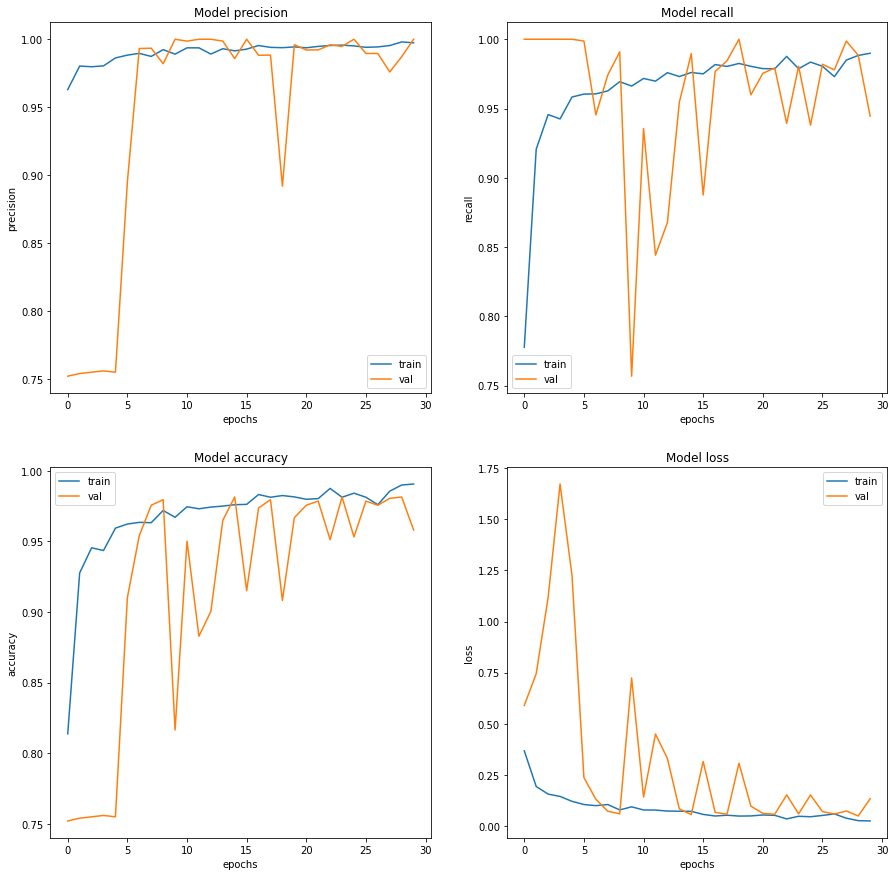

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_1.history[met])
    ax[i].plot(history_1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

좌우 반전

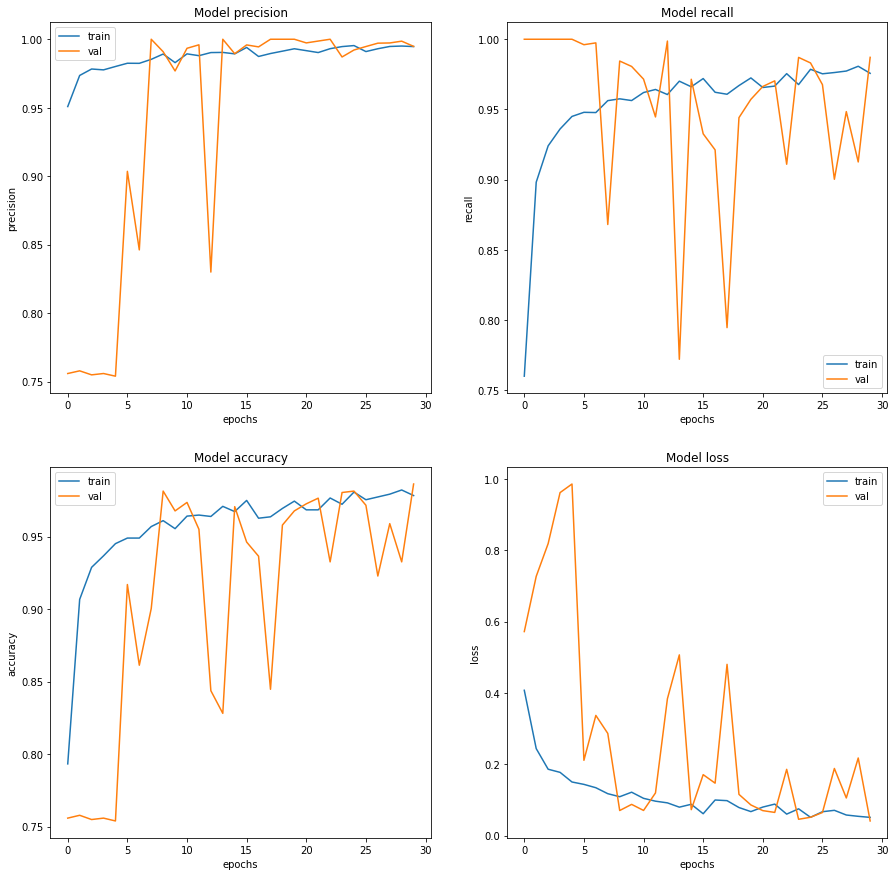

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_2.history[met])
    ax[i].plot(history_2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

이미지 대비

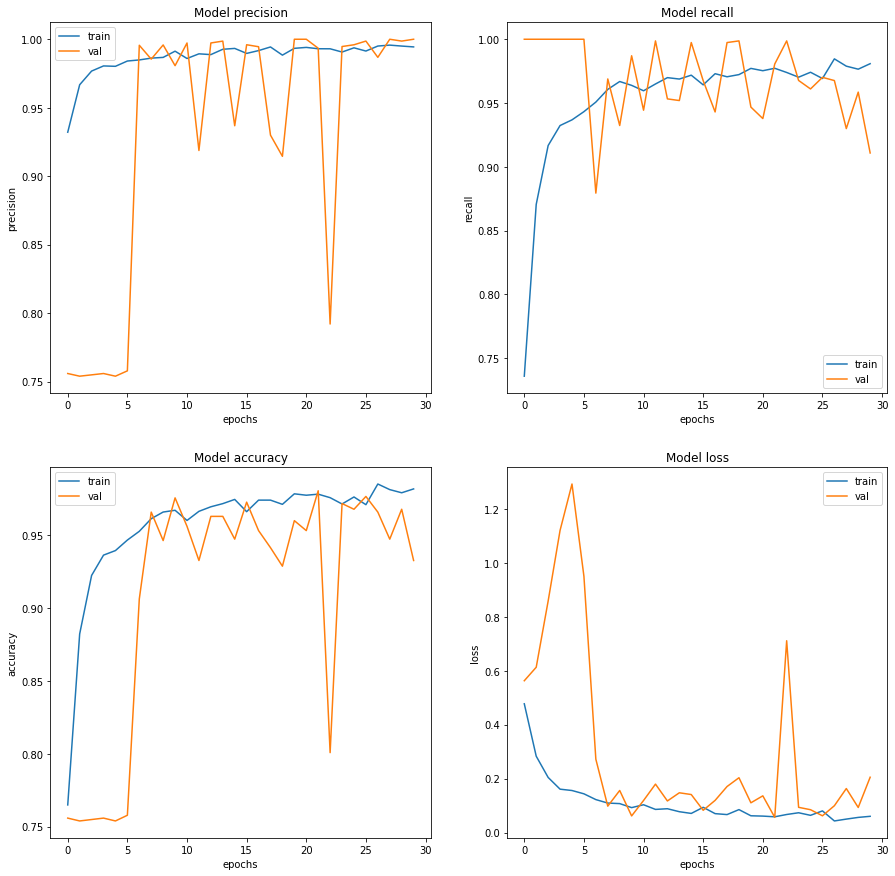

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_3.history[met])
    ax[i].plot(history_3.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

drop out 제거

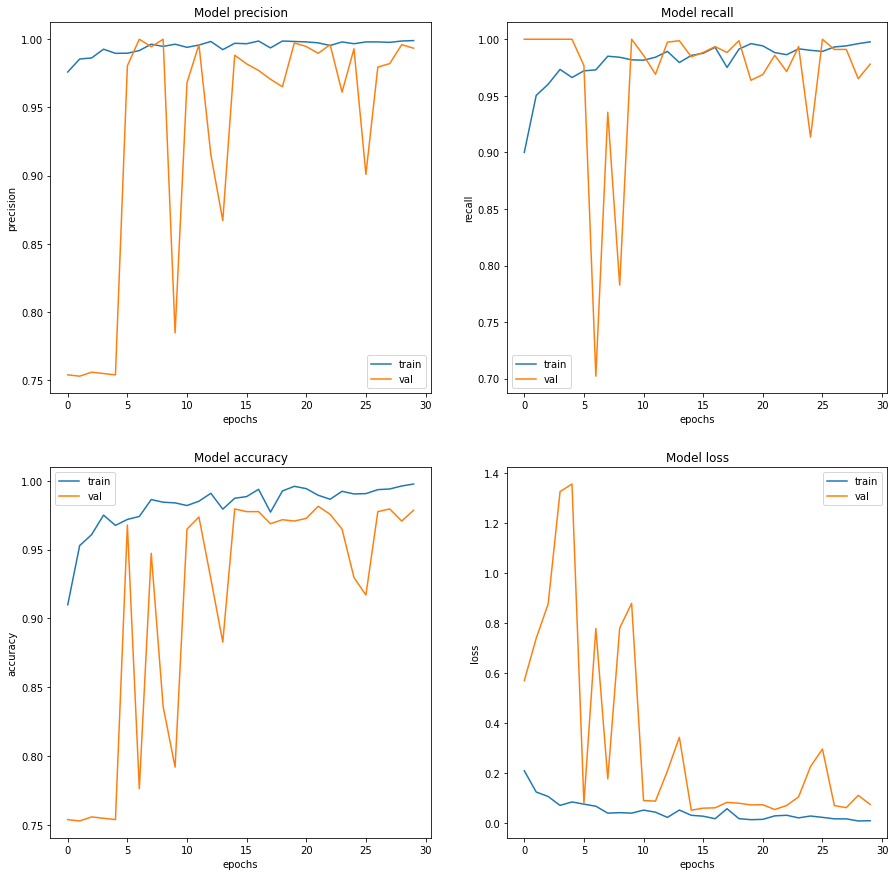

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_4.history[met])
    ax[i].plot(history_4.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

regularization

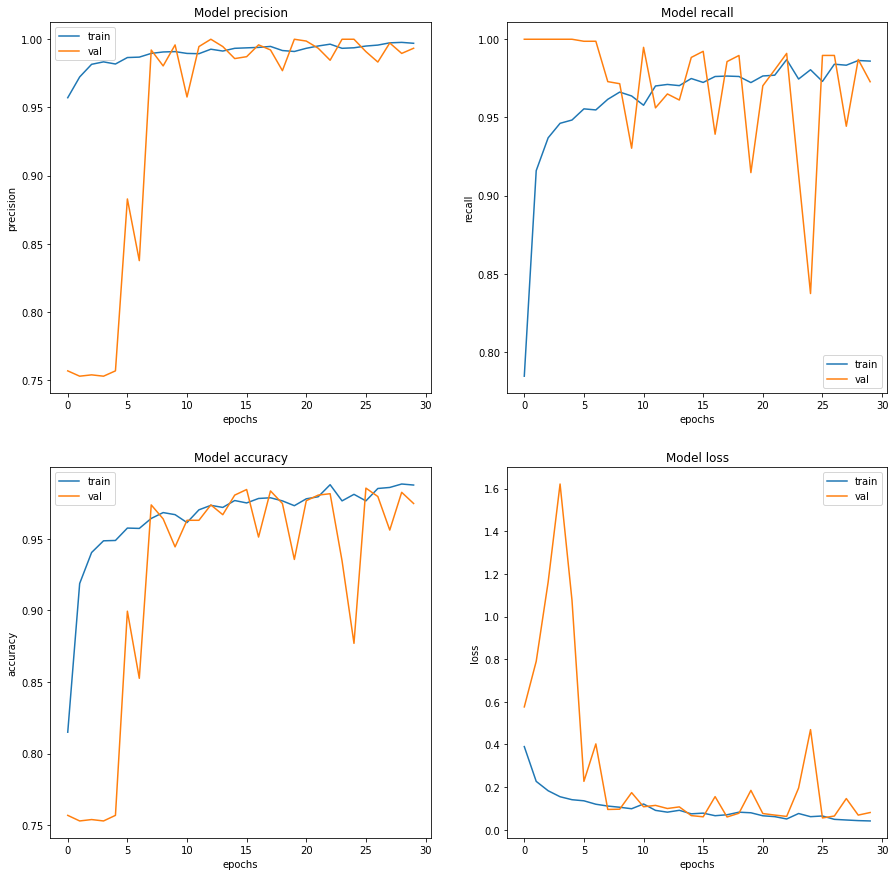

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history_5.history[met])
    ax[i].plot(history_5.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


### 모델 평가를 위해 loss, accuracy, precision, recall 값을 출력

In [71]:
#base line
loss_1, acc_1, prec_1, rec_1 = model_1.evaluate(test_ds_1)

20/20 [==============================] - 3s 145ms/step - loss: 0.7985 - accuracy: 0.8429 - precision: 0.8230 - recall: 0.9538


In [72]:
#좌우반전
loss_2, acc_2, prec_2, rec_2 = model_2.evaluate(test_ds_2)

20/20 [==============================] - 3s 142ms/step - loss: 1.0159 - accuracy: 0.7788 - precision: 0.7423 - recall: 0.9897


In [73]:
#이미지 대비
loss_3, acc_3, prec_3, rec_3 = model_3.evaluate(test_ds_3)

20/20 [==============================] - 3s 137ms/step - loss: 0.7277 - accuracy: 0.8606 - precision: 0.8816 - recall: 0.8974


In [74]:
#drop out 제거
loss_4, acc_4, prec_4, rec_4 = model_4.evaluate(test_ds_4)

20/20 [==============================] - 3s 140ms/step - loss: 1.1949 - accuracy: 0.8285 - precision: 0.7882 - recall: 0.9923


In [75]:
#regularization
loss_5, acc_5, prec_5, rec_5 = model_5.evaluate(test_ds_5)

20/20 [==============================] - 3s 141ms/step - loss: 0.8505 - accuracy: 0.8285 - precision: 0.7882 - recall: 0.9923


## 회고

X-Ray 자료를 통해서 특이점을 찾아내 질병 유무를 체크할수 있는 점이 흥미로웠다. 이전에 IBM 왓슨을 통해 암진단에 이용하려고 했을때와 비슷한 느낌을 받았다.
다만 아직까지는 학습한 알고리즘을 통해서 찾아낼수 있는 확율 80% 실제 의료진이 같은 데이터를 통해서 90% 이상의 진단을 할수 있다는 점에서 또 앞서 왓슨과 비슷한 느낌을 받았던 점으로 왓슨 역시 아직까지 인간의 진단율을 넘지 못한데다가 상당한 시간이 흘렀음에도 오히려 왓슨이 정척하지 못하고 있는 점을 볼때 1차 진단을 위한 기본 검사용으로는 적합할듯 싶으나 아직까지는 많은 데이터와 변수에 따른 결과등을 학습해야할 필요가 있다 생각되어진다.

의료 영상 데이터에 인식율을 높이기 위해서 여러 변화를 줘 봤지만 앞서 노드 내용에 나오듯 원본데이터에 변화를 줌으로 얻어지는 데이터의 신뢰도에 대한 찬반 문제도 있기때문에 수정을 가하지 않은 원본 데이터로 원하는 결과값을 얻는 방법을 찾아야 할것이다.
